## Himangi Sharma 102003037 

In [440]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [441]:
df= pd.read_csv("Creditcard_data.csv")

In [442]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [443]:
df.shape

(772, 31)

In [444]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,283.005181,-0.176963,0.217169,0.875172,0.285628,-0.005029,0.159081,0.123329,-0.057547,-0.030384,...,0.004888,-0.096995,-0.040344,-0.002501,0.114337,0.022782,0.023353,-0.017045,68.668290,0.011658
std,171.834196,1.294724,1.173401,1.031878,1.258758,1.098143,1.225682,0.852075,0.830144,0.878183,...,0.609335,0.607228,0.358724,0.621507,0.429667,0.484227,0.300934,0.278332,197.838269,0.107411
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,126.500000,-0.896416,-0.174684,0.308677,-0.460058,-0.534567,-0.630717,-0.296289,-0.167880,-0.517068,...,-0.213746,-0.525289,-0.176915,-0.379766,-0.166227,-0.313631,-0.047868,-0.033083,5.987500,0.000000
50%,282.000000,-0.382618,0.285843,0.905435,0.395919,-0.116612,-0.109581,0.116329,0.034755,-0.082270,...,-0.075802,-0.076551,-0.048353,0.091886,0.143723,-0.026414,0.023199,0.021034,16.665000,0.000000
75%,432.000000,1.110739,0.885745,1.532969,1.117559,0.452818,0.482972,0.575390,0.252395,0.412261,...,0.095149,0.307438,0.070085,0.426339,0.425798,0.260408,0.112199,0.087023,55.527500,0.000000
max,581.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,2.134599,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.136720,3.087444,2.490503,1.575380,3828.040000,1.000000


In [445]:
classfreq=df['Class'].value_counts()
count_0, count_1 = df['Class'].value_counts()
print("Number of classes in dataset:", len(classfreq))
print("\nCount of the class 0:", count_0)
print("Count of the class 1:", count_1)
classfreqpercentage=df['Class'].value_counts(normalize=True) * 100
print("\nPercentage of count of the classes:\n", classfreqpercentage)

Number of classes in dataset: 2

Count of the class 0: 763
Count of the class 1: 9

Percentage of count of the classes:
 0    98.834197
1     1.165803
Name: Class, dtype: float64


Text(0.5, 1.0, 'Distributions of classes: 0-No Fraud , 1-Fraud')

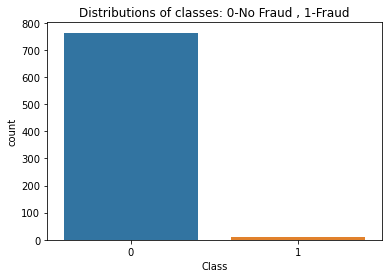

In [448]:
sns.countplot('Class', data=df)
plt.title('Distributions of classes: 0-No Fraud , 1-Fraud')

## Balancing the imbalanced dataset

In [449]:
class0 = df[df['Class'] == 0]
class1 = df[df['Class'] == 1]
print("Class 0: No fraud = ", class0.shape)
print("Class 1: Fraud = ", class1.shape)

Class 0: No fraud =  (763, 31)
Class 1: Fraud =  (9, 31)


### Oversampling the minority class
which is the class 1 in this case

In [450]:
over_class1 = class1.sample(count_0, replace=True)

In [451]:
print("Class 0: No fraud = ", class0.shape)
print("Class 1 after oversampling: Fraud = ", over_class1.shape)

Class 0: No fraud =  (763, 31)
Class 1 after oversampling: Fraud =  (763, 31)


In [452]:
df2 = pd.concat([over_class1,class0],ignore_index = True)

In [453]:
print("Dimensions after oversampling of minority class: ",df2.shape)
df2['Class'].value_counts()

Dimensions after oversampling of minority class:  (1526, 31)


1    763
0    763
Name: Class, dtype: int64

### Plotting the new distribution of classes:

Text(0.5, 1.0, 'Distributions of classes after oversampling: 0-No Fraud , 1-Fraud')

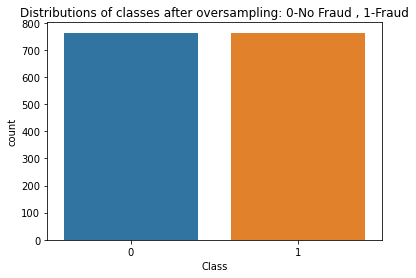

In [455]:
sns.countplot('Class', data=df2)
plt.title('Distributions of classes after oversampling: 0-No Fraud , 1-Fraud')

## Sampling and application of ML Models

In [508]:
def ml_models() :
    ml_model = {}
    ml_model['GaussianNB']= GaussianNB()
    ml_model['DecisionTreeClassifier']= DecisionTreeClassifier()
    ml_model['LogisticRegression'] = LogisticRegression(max_iter=2000)
    ml_model['SVM']= SVC()
    ml_model['KNN'] = KNeighborsClassifier()
    return ml_model

def model_accuracy_score(x_train,y_train,x_test,y_test) :
    m = ml_models()
    
    for name,model in m.items() :
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        print('The model used: ',name)
        print('Accuracy: ',sklearn.metrics.accuracy_score(y_test,y_pred),"\n")
        


### 1. Simple Random Sampling without replacement
n = (Z^2 x P x (1-P))/(E^2)  <br>
Z = 1.96 <br>
P = 763/1519 = 0.502 <br>
E = 0.05 <br>
n = (1.96^2 x 0.5 x (1-0.5))/(0.05^2) = 384.16 = 384 <br>

In [509]:
def samplesize(z,p,e):
    return (((z**2)*p*(1-p))/((e)**2))
n1= int(samplesize(1.96,0.5,0.05))

sample1 = df2.sample(n=n1, random_state=42,replace= False)
print("Shape: ",sample1.shape)
print("Count: \n",sample1.Class.value_counts())

Shape:  (384, 31)
Count: 
 0    207
1    177
Name: Class, dtype: int64


In [510]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(sample1.iloc[:,:30], sample1.iloc[:,30], test_size=0.33, random_state=42)

In [511]:
model_accuracy_score(x_train1,y_train1,x_test1,y_test1)

The model used:  GaussianNB
Accuracy:  0.6456692913385826 

The model used:  DecisionTreeClassifier
Accuracy:  0.968503937007874 

The model used:  LogisticRegression
Accuracy:  0.9291338582677166 

The model used:  SVM
Accuracy:  0.6456692913385826 

The model used:  KNN
Accuracy:  0.9763779527559056 



#### Highest accuracy is 0.97 by using KNN classifier for Simple Random Sampling without replacement

### 2. Simple Random Sampling without replacement

In [512]:
sample2 = df2.sample(n=n1, replace= True)
print("Shape: ",sample2.shape)
print("Count: \n",sample2.Class.value_counts())

Shape:  (384, 31)
Count: 
 1    203
0    181
Name: Class, dtype: int64


In [513]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(sample2.iloc[:,:30], sample2.iloc[:,30], test_size=0.33, random_state=42)

In [514]:
model_accuracy_score(x_train2,y_train2,x_test2,y_test2)

The model used:  GaussianNB
Accuracy:  0.8267716535433071 

The model used:  DecisionTreeClassifier
Accuracy:  0.984251968503937 

The model used:  LogisticRegression
Accuracy:  0.937007874015748 

The model used:  SVM
Accuracy:  0.5905511811023622 

The model used:  KNN
Accuracy:  0.9291338582677166 



#### Highest accuracy is 0.98 by using Decision Tree Classifier for Simple Random Sampling with replacement

### 3. Systematic Sampling

In [515]:
k = 3   #1519/384
sys = df2.iloc[::k]
sample3 = sys.sample(n=n1)
print("Shape: ",sample3.shape)
print("Count: \n",sample3.Class.value_counts())

Shape:  (384, 31)
Count: 
 1    198
0    186
Name: Class, dtype: int64


In [516]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(sample3.iloc[:,:30], sample3.iloc[:,30], test_size=0.33, random_state=42)

In [517]:
model_accuracy_score(x_train3,y_train3,x_test3,y_test3)

The model used:  GaussianNB
Accuracy:  0.7637795275590551 

The model used:  DecisionTreeClassifier
Accuracy:  0.9763779527559056 

The model used:  LogisticRegression
Accuracy:  0.9212598425196851 

The model used:  SVM
Accuracy:  0.6141732283464567 

The model used:  KNN
Accuracy:  0.9291338582677166 



#### Highest accuracy is 0.97 by using Decision Tree Classifier for Systematic Sampling

### 4. Stratified Sampling

In [518]:
n2 = int((1.96*1.96 * 0.5*0.5)/((0.1/2)**2)/2)
n2

192

In [519]:
sample4=df2.groupby('Class', group_keys=False).apply(lambda x: x.sample(n2))
print("Shape: ",sample4.shape)
print("Count: \n",sample4.Class.value_counts())

Shape:  (384, 31)
Count: 
 0    192
1    192
Name: Class, dtype: int64


In [520]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(sample4.iloc[:,:30], sample4.iloc[:,30], test_size=0.33, random_state=42)

In [521]:
model_accuracy_score(x_train4,y_train4,x_test4,y_test4)

The model used:  GaussianNB
Accuracy:  0.7244094488188977 

The model used:  DecisionTreeClassifier
Accuracy:  0.9291338582677166 

The model used:  LogisticRegression
Accuracy:  0.952755905511811 

The model used:  SVM
Accuracy:  0.6850393700787402 

The model used:  KNN
Accuracy:  0.9133858267716536 



#### Highest accuracy is 0.95 by using Logistic Regression for Stratified Sampling

### 5. Cluster Sampling
n = (Z^2 x P x (1-P))/((E/C)^2)

In [522]:
n5=int((1.96*1.96 * 0.5*0.5)/((0.1/2)**2)/2)

In [523]:
def Cluster_sample(df, cluster_size, cluster_count):
    N = len(df)
    K = int(N/cluster_size)
    data = None
    for k in range(K):
        sample_k = df.sample(cluster_size)
        sample_k["cluster"] = np.repeat(k,len(sample_k))
        df = df.drop(index = sample_k.index)
        data = pd.concat([data,sample_k],axis = 0)

    clusters_chosen = np.random.randint(0,K,size = cluster_count)
    samples = data[data.cluster.isin(clusters_chosen)]
    return(samples)

sample5 = Cluster_sample(df2, n5, 2) 
sample5 = sample5.iloc[:,0:31]
print("Shape: ",sample5.shape)
print("Count: \n",sample5.Class.value_counts())

Shape:  (384, 31)
Count: 
 1    201
0    183
Name: Class, dtype: int64


In [524]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(sample5.iloc[:,:30], sample5.iloc[:,30], test_size=0.33, random_state=42)

In [525]:
model_accuracy_score(x_train5,y_train5,x_test5,y_test5)

The model used:  GaussianNB
Accuracy:  0.6692913385826772 

The model used:  DecisionTreeClassifier
Accuracy:  0.9291338582677166 

The model used:  LogisticRegression
Accuracy:  0.8818897637795275 

The model used:  SVM
Accuracy:  0.7244094488188977 

The model used:  KNN
Accuracy:  0.937007874015748 



#### Highest accuracy is 0.93 by using KNN for Cluster Sampling